In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
economic_data=pd.read_csv('../MultipleLinearRegression/Data/economic_index.csv')
economic_data.head()


,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
economic_data.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [4]:
economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


In [6]:
# we need to drop columns we dont use that
economic_data=economic_data.drop(['Unnamed: 0','year','month'],axis=1)
economic_data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
len(economic_data)

24

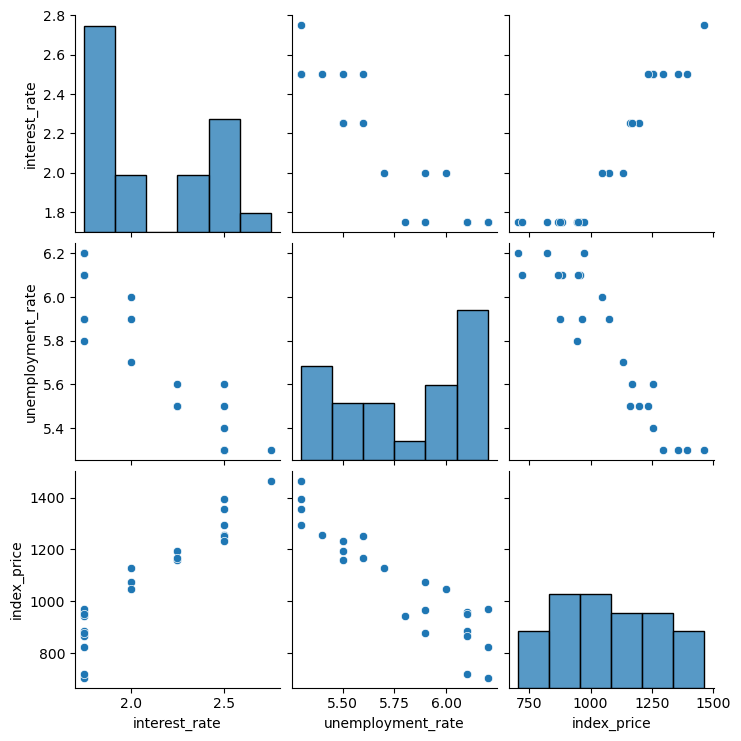

In [12]:
sns.pairplot(economic_data)

Text(0, 0.5, 'unemployment_rate')

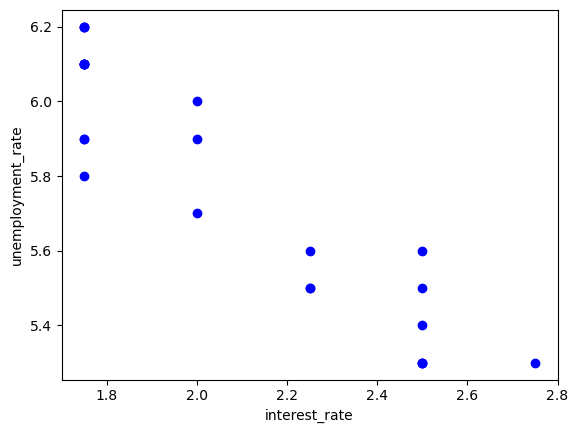

In [14]:
plt.scatter(x=economic_data.interest_rate,y=economic_data.unemployment_rate,c='b')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [15]:
economic_data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [17]:
#Here below we assigned that which is dependent and which is independer variable in our dataset
X=economic_data.iloc[:,:-1]
y=economic_data.iloc[:,-1]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [20]:
#we need to declare the train test split lib using sklearn lib

from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
# above code which is randomly split the train and test data in out dataset

<Axes: xlabel='interest_rate', ylabel='index_price'>

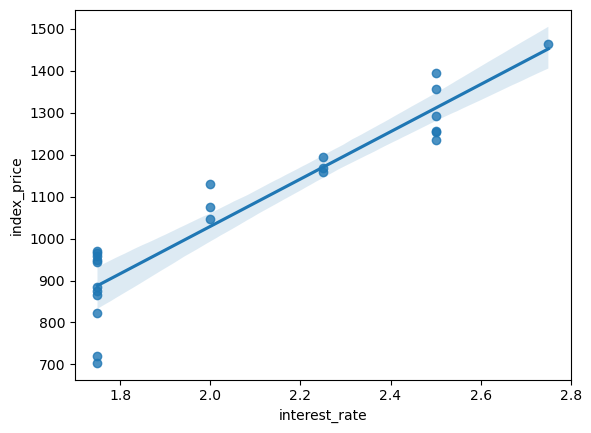

In [22]:
sns.regplot(x=economic_data.interest_rate,y=economic_data.index_price)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

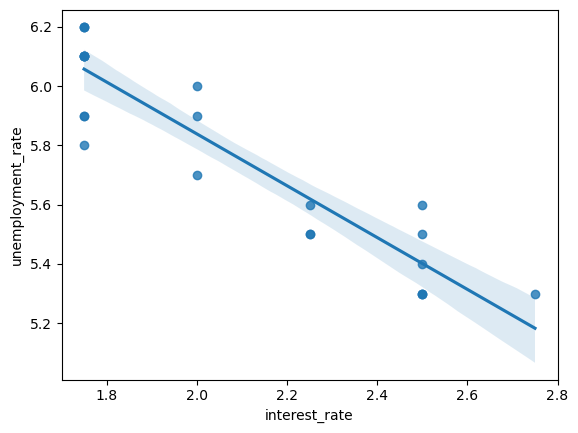

In [23]:
sns.regplot(x=economic_data.interest_rate,y=economic_data.unemployment_rate)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

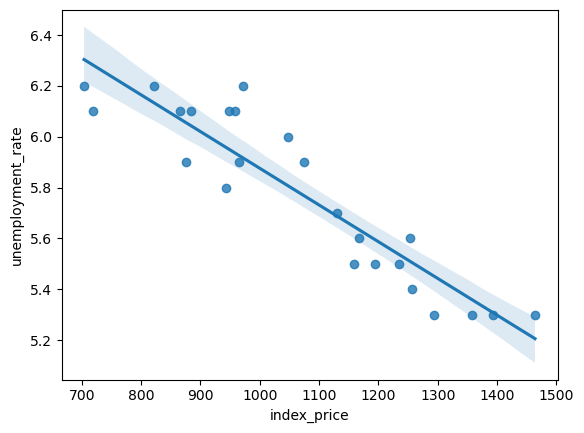

In [24]:
sns.regplot(x=economic_data.index_price,y=economic_data.unemployment_rate)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
standard_scalar=StandardScaler()

In [27]:
X_train.head()

,interest_rate,unemployment_rate
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1


In [28]:
X_train=standard_scalar.fit_transform(X_train)

In [29]:
X_train

array([[-0.89073374,  1.25707872],
       [ 1.35954097, -0.62853936],
       [ 1.35954097, -1.5713484 ],
       [-0.14064217,  0.62853936],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -1.5713484 ],
       [ 1.35954097, -1.25707872],
       [-0.89073374,  1.25707872],
       [-0.89073374,  0.94280904],
       [-0.89073374,  0.31426968],
       [-0.89073374,  0.94280904],
       [ 0.6094494 , -0.94280904],
       [-0.14064217, -0.31426968],
       [-0.89073374,  0.        ],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -0.94280904]])

In [30]:
X_test=standard_scalar.fit_transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
lr=LinearRegression()

In [33]:
lr.fit(X_train,y_train) # here we trained our model using LR

LinearRegression()

In [34]:
# now we are going to predict the data using sample test which wasnt use during trainig time

predict_price=lr.predict(X_test)

In [50]:
predict_price

array([1141.63549621,  787.98167849, 1339.94389614,  819.05076205,
        949.27404557, 1110.56641265,  881.18892917, 1271.85877973])

In [61]:
predict_price=np.round(predict_price)
pricepredicted_data={'Actual Price':y_test,'Predicted Price':predict_price}
pd.DataFrame(data=pricepredicted_data)

,Actual Price,Predicted Price
8,1159,1142.0
16,971,788.0
0,1464,1340.0
18,884,819.0
11,1075,949.0
9,1167,1111.0
13,965,881.0
1,1394,1272.0


Text(0, 0.5, 'Predicted Price')

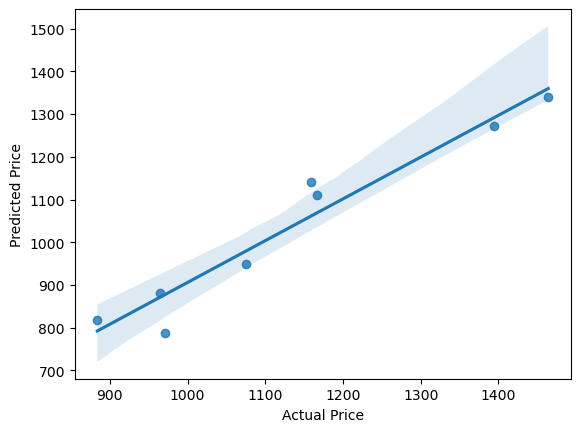

In [63]:
sns.regplot(x=y_test,y=predict_price) 
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

Text(0, 0.5, 'Predicted Price')

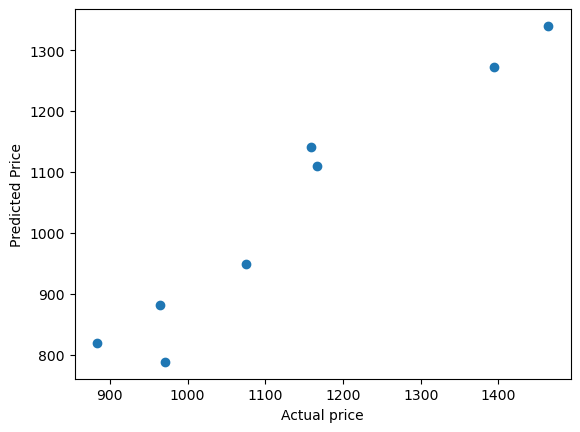

In [57]:
plt.scatter(x=y_test,y=predict_price)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')

In [54]:
# Now below we find the performance metrx for our model
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_absolute_error(y_test,predict_price)
mae=mean_squared_error(y_test,predict_price)
rmse=np.sqrt(mse)

In [55]:
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)

mse: 97.18750000000011
mae: 11792.511387420975
rmse: 9.858372076565182


## R2 Score

In [64]:
from sklearn.metrics import r2_score

score=r2_score(y_test,predict_price)
print(score)

0.6848478065407669


## Residuals

In [65]:
residuals=y_test-predict_price
print(residuals)

8      17.0
16    183.0
0     124.0
18     65.0
11    126.0
9      56.0
13     84.0
1     122.0
Name: index_price, dtype: float64


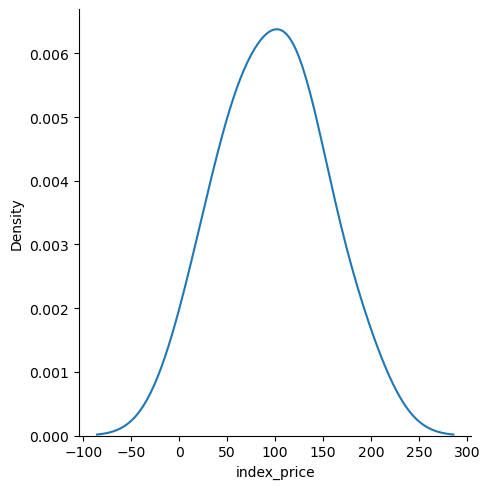

In [67]:
## Do plot for this residuals
sns.displot(residuals,kind='kde')

In [73]:
print(lr.coef_)

[  96.28689501 -101.57024663]


## Done.Multiple linear regression using economics data